# Interpreting an AB Test

In [1]:
# estimate sample size via power analysis
import statsmodels as sm
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import ttest_ind
import pandas as pd



def cohen_d(mean_1, mean_2, pooled_sd):
    diff = (mean_1 - mean_2)
    cohen_d = diff/pooled_sd
    return(cohen_d)
    





* Calculate Cohen's D for increasing click rate from 3% to 8%.
* Assume the pooled standard deviation to be 14

`Mean 1 - Mean 2 / pooled SD`

In [2]:
cohen_d(3,8,14)

-0.35714285714285715

According to the rule of thumb given by Cohen, how big of an effect size is this?


Given this effect size, how many samples will we need to collect in order to not make a type II error?

In [3]:
# Set Parameters 

effect = 0.01
alpha = 0.05
power = 0.9

# Perform Power Analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 210149.354


In [4]:
import pandas as pd

df = pd.read_csv("experiment_data.csv")

df

,Unnamed: 0,baseline,experiment
0,1,6.584851,12.070477
1,2,8.199590,8.754982
2,3,4.853006,7.448798
3,4,6.617510,7.823632
4,5,7.615770,8.830345
...,...,...,...
127,128,7.968590,10.553795
128,129,7.346377,10.040481
129,130,1.436617,7.947673
130,131,6.285454,7.078833


In [5]:
df = pd.read_csv("experiment_data.csv")

df

big_test = sm.stats.weightstats.ttest_ind(df['baseline'], 
                               df['experiment'], 
                               alternative='two-sided', 
                               usevar='pooled', value=0)
                                                          
                                                          
print("The critical value is:", big_test[0])
print("The p value value is:", big_test[1])                                                          
print("Degrees of Freedom:", big_test[2])                                                          

The critical value is: -12.735895121086049
The p value value is: 3.046638134432578e-29
Degrees of Freedom: 262.0


In [6]:
!ls

AB Interpretation.ipynb   create_dummy_data.R       experiment_data_small.csv
README.md                 experiment_data.csv


# Your Turn! 

Find the file `experiment_data_small.csv` in the current working directory and run a t-test on this data.

* First report the p value of the test
* Second, write a statement on what the p value means
* Third, use the function from above to calculate the effect size
* Fourth, write a paragraph reccomending if we should adopt the change made by the second AB test we have run!

Be prepared to be assigned to a side where you advocate for adopting the new change or not adopting the new change!

In [26]:
df1 = pd.read_csv('experiment_data_small.csv')
df1.head()

,Unnamed: 0,baseline_small,experiment_small
0,1,4.089394,5.506201
1,2,10.884680,26.349077
2,3,17.741562,-18.941091
3,4,10.170520,33.235422
4,5,8.978086,8.503653


In [27]:
# SD_pooled = square root of (SD1 + SD2)/2
SD_pooled = ((df1['baseline_small'].std()**2+df1['experiment_small'].std()**2)/2)**0.5
mean_baseline = df1['baseline_small'].mean()
mean_experiment = df1['experiment_small'].mean()


print("Mean 1 is", mean_baseline)
print("Mean 2 is", mean_experiment)
print("Pooled standard deviation is", SD_pooled)

#Cohen's d is an effect size used to indicate the standardised difference between two means.
def cohen_d(mean_1, mean_2, pooled_sd):
    diff = (mean_1 - mean_2)
    cohen_d = diff/pooled_sd
    return(cohen_d)

print("Our effect size or Cohen's D is", cohen_d(mean_baseline, mean_experiment, SD_pooled))

Mean 1 is -0.3914423848805543
Mean 2 is 6.177880867292604
Pooled standard deviation is 14.42780381651844
Our effect size or Cohen's D is -0.4553238549481744


In [9]:
big_test1 = sm.stats.weightstats.ttest_ind(df1['baseline_small'], 
                               df1['experiment_small'], 
                               alternative='two-sided', 
                               usevar='pooled', value=0)
                                                          
print("The critical value is:", big_test1[0])
print("The p value value is:", big_test1[1])                                                          
print("Degrees of Freedom:", big_test1[2])

The critical value is: -1.7634617073452414
The p value value is: 0.08308969146581927
Degrees of Freedom: 58.0


In [10]:
# As seen above, the p value value is: 0.08308969146581927
# The p value is the probability of geeting your sample statistics, given the null hypothesis is true.
# In this case, our p value is higher than our alpha of 0.05 therefore we fail to reject the null hypothesis.

In [11]:
# If we run the test again however this time only look for a change in the negative direction:

big_test2 = sm.stats.weightstats.ttest_ind(df1['baseline_small'], 
                               df1['experiment_small'], 
                               alternative='smaller', 
                               usevar='pooled', value=0)
                                                          
print("The critical value is:", big_test2[0])
print("The p value value is:", big_test2[1])                                                          
print("Degrees of Freedom:", big_test2[2])

The critical value is: -1.7634617073452414
The p value value is: 0.04154484573290963
Degrees of Freedom: 58.0


In [12]:
# The p value is now 0.04154484573290963 and we can reject the null hypothesis and accept the alternative hypothesis
# I am unsure how to interpret this given we are taking all values in the negative direction, please could we
# go over this tomorrow if you have a second Dave thanks!

In [21]:
import seaborn as sns
import numpy as np

-0.3914423848805543
6.177880867292604


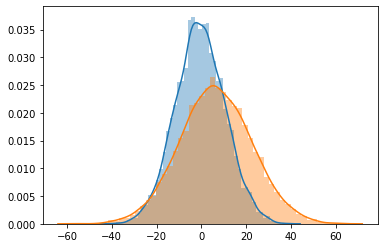

In [30]:
sns.distplot(np.random.normal(mean_baseline, int(df1['baseline_small'].std()), 10000))
sns.distplot(np.random.normal(mean_experiment, int(df1['experiment_small'].std()), 10000))

print(mean_baseline)
print(mean_experiment)